In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Customers are the most important asset of any business, therefore it's very important to design marketing campains tailored to the different needs and preferences of each customer. Retaining customers rather than acquiring new ones is less expensive and has the advantage that we can use transactional data to find purchase patterns of customers. Because a 

In this notebook I use an online retail dataset to perform an RFM analysis which stands for Recency, Frequency and Monetary value. This analysis is a behavior based customer segmentation technique that uses transactional data to understand the different types of groups of customers. This information is important for marketing purposes, customer retention,  

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Transform object column (InvoiceDate) into datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Exploratory Data Analysis and cleaning

First I will explore data using some simple functions

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
print("Total number of (unique) customers: ", df['CustomerID'].nunique())

Total number of (unique) customers:  4372


In [7]:
print("Total number of transactions: ", df['InvoiceNo'].nunique())

Total number of transactions:  25900


In [8]:
print("Total number of (unique) products: ", df['StockCode'].nunique())

Total number of (unique) products:  4070


In [9]:
print("Total number of (unique) descriptions: ", df['Description'].nunique())

Total number of (unique) descriptions:  4223


In [10]:
print("Period of observation: ", df['InvoiceDate'].max(), " : ", df['InvoiceDate'].min())

Period of observation:  2011-12-09 12:50:00  :  2010-12-01 08:26:00


Note that there are some missing values in the CustomerID column

In [11]:
missingCustomerId = df[df['CustomerID'].isna()]
missingCustomerId.reset_index(inplace=True, drop=True)
missingCustomerId

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
2,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
3,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
4,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
135075,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
135076,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
135077,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
135078,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [12]:
# All transaction with known 
(df.groupby('InvoiceNo')['CustomerID'].nunique() > 1).sum()

0

# Data cleaning

In [13]:
# There are several missing values in the CustomerID column so let's remove them
# We are removing 135080 rows that are preserved in the missingCustomerID dataframe
df = df.dropna(axis=0, subset='CustomerID')

In [14]:
# No more missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [15]:
df['CustomerID'].nunique()

4372

In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


Note that there are negative values for the Quantity column. Apparently the corresponding transactions are associated with canceled orders.

In [17]:
# To solve this problem I will add a new column indicating whether a transaction is a cancellation or not
df['IsCanceled'] = df['InvoiceNo'].apply(lambda x: str(x)[0] == 'C')

In [18]:
# Also I will add a total column
df['Total'] = df['Quantity'].multiply(df['UnitPrice'])

In [19]:
df[df['IsCanceled']==True].sort_values(by='Total')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCanceled,Total
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,True,-168469.60
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,True,-77183.60
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,True,-38970.00
422375,C573079,M,Manual,-2,2011-10-27 14:15:00,4161.06,12536.0,France,True,-8322.12
173277,C551685,POST,POSTAGE,-1,2011-05-03 12:51:00,8142.75,16029.0,United Kingdom,True,-8142.75
...,...,...,...,...,...,...,...,...,...,...
199723,C554100,16235,RECYCLED PENCIL WITH RABBIT ERASER,-1,2011-05-22 13:27:00,0.21,15555.0,United Kingdom,True,-0.21
440246,C574524,84929,ASSTD FRUIT+FLOWERS FRIDGE MAGNETS,-1,2011-11-04 13:53:00,0.19,17841.0,United Kingdom,True,-0.19
329372,C565843,85194S,HANGING SPRING FLOWER EGG SMALL,-1,2011-09-07 12:15:00,0.19,14606.0,United Kingdom,True,-0.19
72727,C542256,21883,STARS GIFT TAPE,-1,2011-01-26 17:04:00,0.19,17722.0,United Kingdom,True,-0.19


In [20]:
# The following cell shows an example of a canceled order and its counterpart
df[df['CustomerID']==12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCanceled,Total
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,False,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,True,-77183.6


In [21]:
# Some customers have a great number of cancelled orders. This might induce a bias in the final results
df.groupby('CustomerID')['IsCanceled'].sum().sort_values(ascending=False).head(20)

CustomerID
14911.0    226
17841.0    136
17511.0    113
15311.0    112
12607.0    101
14410.0     93
13798.0     90
14606.0     82
13113.0     79
12471.0     71
14680.0     62
12415.0     62
12472.0     52
12709.0     49
13534.0     46
12748.0     46
16801.0     45
13069.0     45
15005.0     41
14426.0     40
Name: IsCanceled, dtype: int64

In [22]:
# For example the customer with most transactions (5903) has 226 cancelled orders which represents 0.03%
df[df['CustomerID']==14911]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCanceled,Total
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,2010-12-01 14:05:00,9.95,14911.0,EIRE,False,39.8
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911.0,EIRE,False,17.7
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911.0,EIRE,False,15.3
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,2010-12-01 14:05:00,0.85,14911.0,EIRE,False,42.5
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,2010-12-01 14:05:00,2.25,14911.0,EIRE,False,13.5
...,...,...,...,...,...,...,...,...,...,...
539151,581433,22192,BLUE DINER WALL CLOCK,2,2011-12-08 15:54:00,8.50,14911.0,EIRE,False,17.0
539152,581433,48187,DOORMAT NEW ENGLAND,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,False,16.5
539153,581433,48184,DOORMAT ENGLISH ROSE,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,False,16.5
539154,581433,20685,DOORMAT RED RETROSPOT,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,False,16.5


Some "negative" orders do not have a corresponding "positive order". Thus, we cannot simply keep or remove all these cancelled orders. We need a way to lessen to effect of these. It might plausible to deal with this problem by removing customers whose % of cancelled orders is higher than a predefined threshold; for example, 10%.

In [23]:
agg_data = df.groupby('CustomerID').agg({'InvoiceNo' : 'count',
                                         'IsCanceled' : 'sum',
                                         'Total': 'sum'}).reset_index()
agg_data.columns = ['CustomerID', 'Frequency', 'TotalCancelled', 'TotalSpent']
agg_data['ratio'] = agg_data['TotalCancelled'] / agg_data['Frequency']
agg_data.sort_values(by='ratio')

,CustomerID,Frequency,TotalCancelled,TotalSpent,ratio
2185,15300.0,28,0,496.44,0.0
2639,15909.0,7,0,191.94,0.0
2640,15910.0,267,0,1232.18,0.0
2641,15912.0,19,0,264.62,0.0
2643,15917.0,12,0,123.10,0.0
...,...,...,...,...,...
2900,16262.0,3,3,-31.65,1.0
2892,16252.0,21,21,-295.09,1.0
1004,13693.0,4,4,-32.00,1.0
3650,17307.0,1,1,-152.64,1.0


<AxesSubplot:xlabel='ratio', ylabel='Count'>

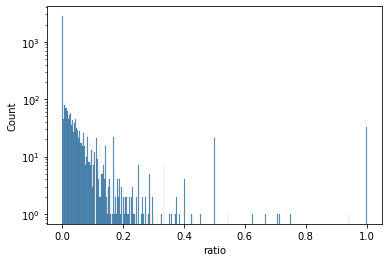

In [24]:
sns.histplot(data=agg_data, x='ratio', log_scale=(False, True))

In [25]:
# I will remove those customer with a ratio larger than 0.1, this corresponds to 338 customers from a total of 4372
bad_customers = agg_data[agg_data['ratio']>=0.1]['CustomerID']
bad_customers

0       12346.0
5       12352.0
32      12384.0
45      12403.0
65      12427.0
         ...   
4359    18269.0
4360    18270.0
4363    18274.0
4364    18276.0
4365    18277.0
Name: CustomerID, Length: 338, dtype: float64

In [26]:
df = df.merge(agg_data, on='CustomerID', how='left')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCanceled,Total,Frequency,TotalCancelled,TotalSpent,ratio
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,15.30,312,15,5288.63,0.048077
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,20.34,312,15,5288.63,0.048077
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,22.00,312,15,5288.63,0.048077
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,20.34,312,15,5288.63,0.048077
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,20.34,312,15,5288.63,0.048077


# RFM analysis

Now that we have processed the data we can proceed to perform the RFM analysis. For each customer I will compute the frequency, recency and the total monetary value of each transaction. Since this type of analysis is common there is now a python library (lifetimes) which is specifically written to analyze transactional data and create statistical models of purchase behavior.  

In [27]:
import lifetimes as lt

In [28]:
# Calculate recency, frequency and monetary value from transactional data. See documentation for precise definitions of these quantities
rfm = lt.utils.summary_data_from_transaction_data(df, "CustomerID", "InvoiceDate", "Total", observation_period_end='2011-12-31')

In [29]:
# monetary_value represents the average value of a given customer’s purchases. 
rfm = rfm.reset_index()
rfm

,CustomerID,frequency,recency,T,monetary_value
0,12346.0,0.0,0.0,347.0,0.000000
1,12347.0,6.0,365.0,389.0,599.701667
2,12348.0,3.0,283.0,380.0,301.480000
3,12349.0,0.0,0.0,40.0,0.000000
4,12350.0,0.0,0.0,332.0,0.000000
...,...,...,...,...,...
4367,18280.0,0.0,0.0,299.0,0.000000
4368,18281.0,0.0,0.0,202.0,0.000000
4369,18282.0,2.0,119.0,148.0,38.195000
4370,18283.0,13.0,334.0,359.0,152.802308


In [30]:
# I will also add a column with the total of money spent
total = df.groupby('CustomerID')[['TotalSpent']].max().reset_index()
total.columns = ['CustomerID', 'total_spent']
total

,CustomerID,total_spent
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [31]:
rfm = rfm.merge(total, on='CustomerID', how='left')
rfm

,CustomerID,frequency,recency,T,monetary_value,total_spent
0,12346.0,0.0,0.0,347.0,0.000000,0.00
1,12347.0,6.0,365.0,389.0,599.701667,4310.00
2,12348.0,3.0,283.0,380.0,301.480000,1797.24
3,12349.0,0.0,0.0,40.0,0.000000,1757.55
4,12350.0,0.0,0.0,332.0,0.000000,334.40
...,...,...,...,...,...,...
4367,18280.0,0.0,0.0,299.0,0.000000,180.60
4368,18281.0,0.0,0.0,202.0,0.000000,80.82
4369,18282.0,2.0,119.0,148.0,38.195000,176.60
4370,18283.0,13.0,334.0,359.0,152.802308,2094.88


In [32]:
# Note that there are some customers with a negative monetary_value/total_spent
rfm.describe()

,CustomerID,frequency,recency,T,monetary_value,total_spent
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,3.413541,133.723010,247.304209,213.254316,1898.459701
std,1722.390705,6.674343,133.000474,118.384168,372.810217,8219.345141
min,12346.000000,0.000000,0.000000,22.000000,-3528.340000,-4287.630000
25%,13812.750000,0.000000,0.000000,137.000000,0.000000,293.362500
50%,15300.500000,1.000000,98.000000,275.000000,148.955000,648.075000
75%,16778.250000,4.000000,256.000000,353.000000,304.942500,1611.725000
max,18287.000000,145.000000,373.000000,395.000000,8866.081538,279489.020000


In [33]:
# Remove bad customers (ratio > 10 %) and customers with negative monetary_value/total_spent
rfm = rfm[(rfm['monetary_value']>=0) & (~rfm['CustomerID'].isin(bad_customers))]

In [34]:
rfm.describe()

,CustomerID,frequency,recency,T,monetary_value,total_spent
count,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000
mean,15314.437341,3.405885,135.989092,246.214105,227.506927,1908.403251
std,1719.119140,6.753472,133.330410,118.747766,368.925308,8344.538770
min,12347.000000,0.000000,0.000000,22.000000,0.000000,0.000000
25%,13823.250000,0.000000,0.000000,135.000000,0.000000,305.040000
50%,15326.500000,1.000000,106.000000,274.000000,164.330667,676.595000
75%,16792.750000,4.000000,258.000000,353.000000,316.737500,1684.767500
max,18287.000000,145.000000,373.000000,395.000000,8866.081538,279489.020000


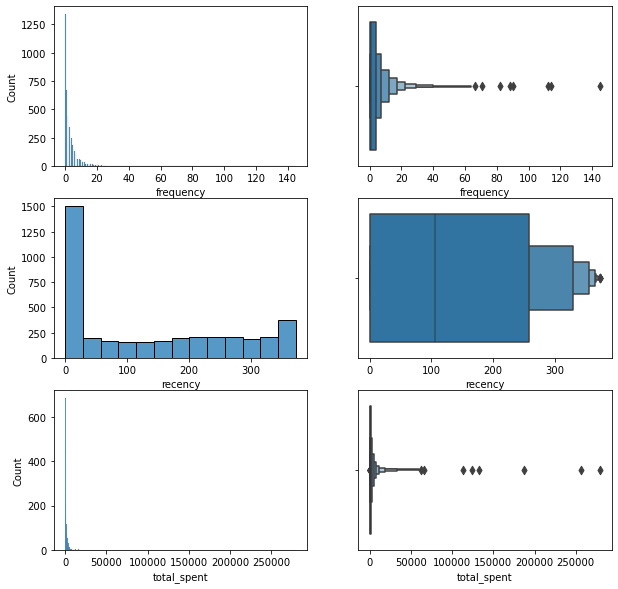

In [35]:
fig, ax = plt.subplots(3, 2, figsize=(10,10))
ax = ax.flatten()

g1 = sns.histplot(data=rfm, x='frequency', ax=ax[0])
b1 = sns.boxenplot(data=rfm, x='frequency', ax=ax[1])

g2 = sns.histplot(data=rfm, x='recency', ax=ax[2])
b2 = sns.boxenplot(data=rfm, x='recency', ax=ax[3])

g3 = sns.histplot(data=rfm, x='total_spent', ax=ax[4])
b3 = sns.boxenplot(data=rfm, x='total_spent', ax=ax[5])

Once obtained the values of frequency, recency and total money spent I will use this information to split customers into different groups. We can do this by following to approaches:
- The first involves dividing each one of the three variables into q quantiles. For example, if q=4 we have a total of 64 possible groups.

- The second involves using some machine learning clustering technique such as k-means or mixture models.

Let's begin with the first approach

In [36]:
# Note that the "best" customer is that who has a larger rencency, frequency and monetary value
rfm['r_category'] = pd.qcut(rfm['recency'], q=5, labels=range(1,5), duplicates='drop').astype(str)
rfm['f_category'] = pd.qcut(rfm['frequency'], q=5, labels=range(1,5), duplicates='drop').astype(str)
rfm['m_category'] = pd.qcut(rfm['total_spent'], q=4, labels=range(1,5)).astype(str)

In [37]:
#Lets create a group column
rfm['group'] = rfm['r_category'] + rfm['f_category'] + rfm['m_category']

In [38]:
rfm

,CustomerID,frequency,recency,T,monetary_value,total_spent,r_category,f_category,m_category,group
1,12347.0,6.0,365.0,389.0,599.701667,4310.00,4,4,4,444
2,12348.0,3.0,283.0,380.0,301.480000,1797.24,3,3,4,334
3,12349.0,0.0,0.0,40.0,0.000000,1757.55,1,1,4,114
4,12350.0,0.0,0.0,332.0,0.000000,334.40,1,1,2,112
6,12353.0,0.0,0.0,226.0,0.000000,89.00,1,1,1,111
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,0.0,0.0,299.0,0.000000,180.60,1,1,1,111
4368,18281.0,0.0,0.0,202.0,0.000000,80.82,1,1,1,111
4369,18282.0,2.0,119.0,148.0,38.195000,176.60,2,2,1,221
4370,18283.0,13.0,334.0,359.0,152.802308,2094.88,4,4,4,444


In [39]:
# Only 55 of the 64 possible groups have members
rfm['group'].nunique()

55

Based on these categories we can divide the customers into 64 groups. For example the group (444) represents customers who bought more frequently, more recently and spent the most. On the contrary, the group (111) corresponds to customers that bought infrequently, a long time ago and spent little; it is very likely that customers belonging to this group are not active anymore. 

Based on these values we can filter out customers that are not of interest or decide how each group should be targeted.

The second approach I am going to be using is K-means clustering. In order to do that I will perform some transformations on data.

In [112]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler

In [125]:
# First I will log-transform frequency and totalspent
rfm['logfrequency'] = np.log10(rfm['frequency']+1)
rfm['logTotalSpent'] = np.log10(rfm['TotalSpent']+1)

In [127]:
scaler = RobustScaler()
X = scaler.fit_transform(rfm[['recency', 'logfrequency', 'logTotalSpent']])

In [117]:
np.isinf(rfm['logTotalSpend']).sum()

1

The next step of the analysis consists in using past transactional data of customers to predict their future behavior. In this notebook I will use a BG/NBD model to do this. This model is one of a collection of probabilistic approaches for modelling purchasing behavior. This model is mathematically simple and allows us to predict things like the probability of a customer being active, the expected number of transactions, and estimate the customer lifetime value.

In [40]:
from lifetimes import BetaGeoFitter
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix

In [41]:
# This model require customer information such as frequency and recency
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(rfm['frequency'], rfm['recency'], rfm['T'])

<lifetimes.BetaGeoFitter: fitted with 3942 subjects, a: 0.01, alpha: 60.45, b: 0.79, r: 0.78>

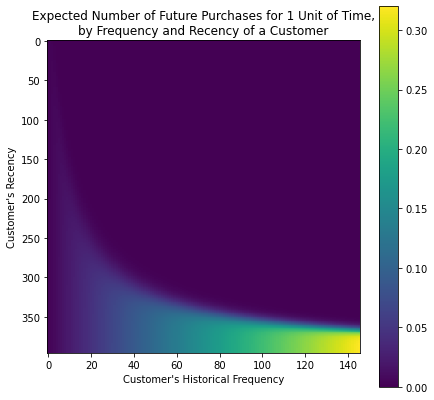

In [71]:
# Once fitted we can explore several quantities such as the future expected number of transactions
fig, ax = plt.subplots(1,1, figsize=(7,7))

ax = plot_frequency_recency_matrix(bgf)
plt.savefig('Expected.png', dpi=200)

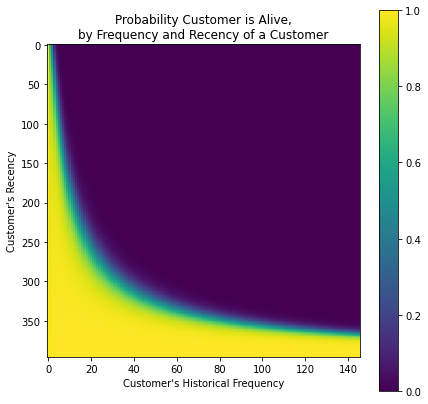

In [72]:
# Or the probability of being alive (active)
fig, ax = plt.subplots(1,1, figsize=(7,7))

ax = plot_probability_alive_matrix(bgf)
plt.savefig('Alive.png', dpi=200)

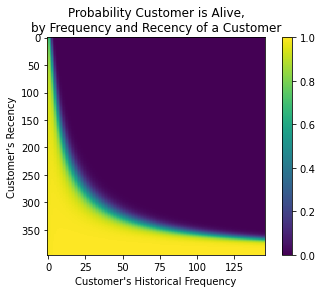

In [47]:
g1 = plot_frequency_recency_matrix(bgf)
g2 = plot_probability_alive_matrix(bgf)

In [ ]:
fig.add_subplot()

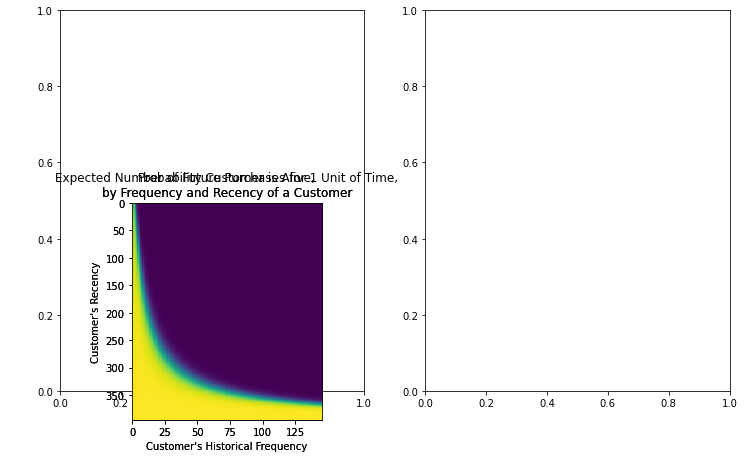

In [69]:
fig, ax = plt.subplots(1,2, figsize=(12,7))

ax[0

g1.figure = fig
fig.axes.append(g1)
fig.add_axes(g1)

g2.figure = fig
fig.axes.append(g2)
fig.add_axes(g2)
plt.show()

In [46]:
plt.plot()

<AxesSubplot:title={'center':'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

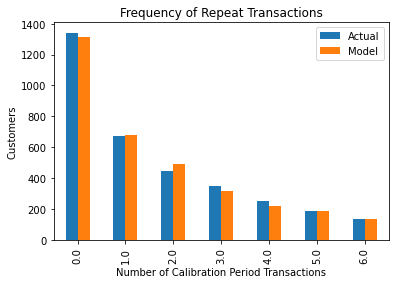

In [54]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

This information is also useful to analyze the value of a customer. For example, we want to retain a customer who has a large probability of being alive and a large expected number of future transaction. 

In [55]:
rfm['prob_alive'] = bgf.conditional_probability_alive(rfm['frequency'], rfm['recency'], rfm['T'])
rfm.head()

,CustomerID,frequency,recency,T,monetary_value,total_spent,r_category,f_category,m_category,group,prob_alive
1,12347.0,6.0,365.0,389.0,599.701667,4310.00,4,4,4,444,0.997144
2,12348.0,3.0,283.0,380.0,301.480000,1797.24,3,3,4,334,0.989620
3,12349.0,0.0,0.0,40.0,0.000000,1757.55,1,1,4,114,1.000000
4,12350.0,0.0,0.0,332.0,0.000000,334.40,1,1,2,112,1.000000
6,12353.0,0.0,0.0,226.0,0.000000,89.00,1,1,1,111,1.000000


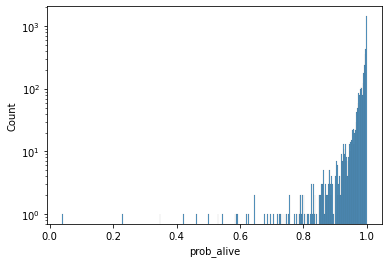

In [60]:
sns.histplot(rfm['prob_alive'], log_scale=(False, True))
plt.show()

In [67]:
# We can also predict the future number of transactions for the next N time periods
for T in range(1, 11):
    rfm['predicted_purchases_' + str(T)] = bgf.conditional_expected_number_of_purchases_up_to_time(T, rfm['frequency'], rfm['recency'], rfm['T']).sort_values()

In [68]:
rfm

,CustomerID,frequency,recency,T,monetary_value,total_spent,r_category,f_category,m_category,group,...,predicted_purchases_1,predicted_purchases_2,predicted_purchases_3,predicted_purchases_4,predicted_purchases_5,predicted_purchases_6,predicted_purchases_7,predicted_purchases_8,predicted_purchases_9,predicted_purchases_10
1,12347.0,6.0,365.0,389.0,599.701667,4310.00,4,4,4,444,...,0.015031,0.030061,0.045091,0.060121,0.075150,0.090179,0.105207,0.120235,0.135262,0.150289
2,12348.0,3.0,283.0,380.0,301.480000,1797.24,3,3,4,334,...,0.008482,0.016963,0.025445,0.033925,0.042406,0.050887,0.059367,0.067847,0.076326,0.084806
3,12349.0,0.0,0.0,40.0,0.000000,1757.55,1,1,4,114,...,0.007715,0.015428,0.023139,0.030848,0.038555,0.046260,0.053964,0.061666,0.069366,0.077065
4,12350.0,0.0,0.0,332.0,0.000000,334.40,1,1,2,112,...,0.001975,0.003949,0.005924,0.007898,0.009873,0.011847,0.013821,0.015795,0.017769,0.019742
6,12353.0,0.0,0.0,226.0,0.000000,89.00,1,1,1,111,...,0.002706,0.005411,0.008116,0.010821,0.013525,0.016230,0.018934,0.021638,0.024341,0.027045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,0.0,0.0,299.0,0.000000,180.60,1,1,1,111,...,0.002156,0.004312,0.006468,0.008623,0.010779,0.012934,0.015089,0.017245,0.019399,0.021554
4368,18281.0,0.0,0.0,202.0,0.000000,80.82,1,1,1,111,...,0.002953,0.005906,0.008858,0.011810,0.014762,0.017713,0.020665,0.023616,0.026566,0.029517
4369,18282.0,2.0,119.0,148.0,38.195000,176.60,2,2,1,221,...,0.013185,0.026368,0.039551,0.052732,0.065913,0.079093,0.092272,0.105449,0.118626,0.131802
4370,18283.0,13.0,334.0,359.0,152.802308,2094.88,4,4,4,444,...,0.032772,0.065543,0.098314,0.131083,0.163851,0.196618,0.229385,0.262150,0.294915,0.327679


In [69]:
rfm.to_csv('customers.csv', index=False)

In [42]:
rfm_ = df.groupby('CustomerID').agg({'InvoiceNo' : 'count',
                                    'IsCanceled' : 'sum',
                                    'Total' : 'sum',
                                    'InvoiceDate' : 'max'}).reset_index()

rfm_.head(15)

,CustomerID,InvoiceNo,IsCanceled,Total,InvoiceDate
0,12346.0,2,1,0.00,2011-01-18 10:17:00
1,12347.0,182,0,4310.00,2011-12-07 15:52:00
2,12348.0,31,0,1797.24,2011-09-25 13:13:00
3,12349.0,73,0,1757.55,2011-11-21 09:51:00
4,12350.0,17,0,334.40,2011-02-02 16:01:00
5,12352.0,95,10,1545.41,2011-11-03 14:37:00
6,12353.0,4,0,89.00,2011-05-19 17:47:00
7,12354.0,58,0,1079.40,2011-04-21 13:11:00
8,12355.0,13,0,459.40,2011-05-09 13:49:00
9,12356.0,59,0,2811.43,2011-11-17 08:40:00


In [44]:
rfm_['ratio'] = rfm_['IsCanceled'] / rfm_['InvoiceNo']

In [45]:
rfm_['recency'] = (rfm_['InvoiceDate'].max() - rfm_['InvoiceDate']).dt.days 

In [46]:
# Here we filter customer to reduce the effect of cancelled transactions
rfm_bad = rfm_[(rfm_['Total']<=0) | (rfm_['ratio']>0.1)]
rfm_good = rfm_[~((rfm_['Total']<=0) | (rfm_['ratio']>0.1))]

In [47]:
rfm_good.sort_values('Total')

,CustomerID,InvoiceNo,IsCanceled,Total,InvoiceDate,ratio,recency
3243,16738.0,1,0,3.75,2011-02-15 09:46:00,0.000000,297
4130,17956.0,1,0,12.75,2011-04-04 13:47:00,0.000000,248
730,13307.0,1,0,15.00,2011-08-11 17:14:00,0.000000,119
3991,17763.0,1,0,15.00,2011-03-21 14:25:00,0.000000,262
2765,16093.0,1,0,17.00,2011-08-25 11:09:00,0.000000,106
...,...,...,...,...,...,...,...
55,12415.0,778,62,123725.45,2011-11-15 14:22:00,0.079692,23
1895,14911.0,5903,226,132572.62,2011-12-08 15:54:00,0.038286,0
3758,17450.0,351,14,187482.17,2011-12-01 13:29:00,0.039886,7
4233,18102.0,433,2,256438.49,2011-12-09 11:50:00,0.004619,0


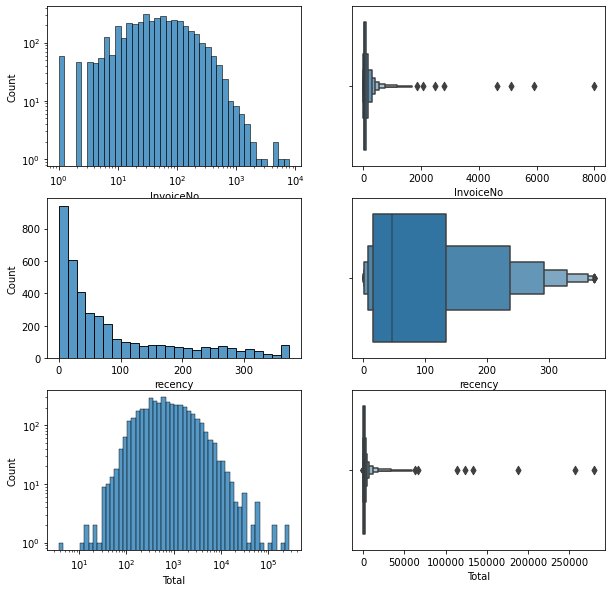

In [48]:
fig, ax = plt.subplots(3, 2, figsize=(10,10))
ax = ax.flatten()

g1 = sns.histplot(data=rfm_good, x='InvoiceNo', log_scale=(True, True), ax=ax[0])
b1 = sns.boxenplot(data=rfm_good, x='InvoiceNo', ax=ax[1])

g2 = sns.histplot(data=rfm_good, x='recency', ax=ax[2])
b2 = sns.boxenplot(data=rfm_good, x='recency', ax=ax[3])

g3 = sns.histplot(data=rfm_good, x='Total', log_scale=(True, True), ax=ax[4])
b3 = sns.boxenplot(data=rfm_good, x='Total', ax=ax[5])

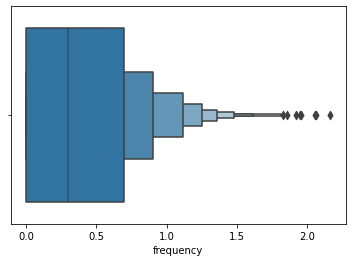

In [123]:
g = sns.boxenplot(np.log10(rfm['frequency']+1))

/home/betor94/anaconda3/envs/Businnes/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


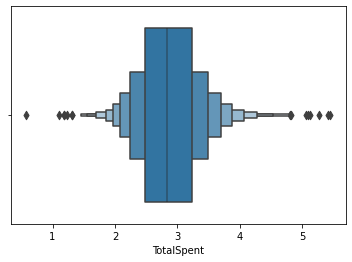

In [124]:
g = sns.boxenplot(np.log10(rfm['TotalSpent']))

Looking at the previous plots we conclude that it might be convenient to transform the total number of transaction and total spent using a log transformation.

In [105]:
rfm_good['log_frequency'] = np.log10(rfm_good['InvoiceNo'])
rfm_good['log_total'] = np.log10(rfm_good['Total'])

/tmp/ipykernel_2758/729469793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_good['log_frequency'] = np.log10(rfm_good['InvoiceNo'])
/tmp/ipykernel_2758/729469793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_good['log_total'] = np.log10(rfm_good['Total'])


In [112]:
rfm_good.head()

,CustomerID,InvoiceNo,IsCanceled,Total,InvoiceDate,ratio,recency,log_frequency,log_total
1,12347.0,182,0,4310.00,2011-12-07 15:52:00,0.0,1,2.260071,3.634477
2,12348.0,31,0,1797.24,2011-09-25 13:13:00,0.0,74,1.491362,3.254606
3,12349.0,73,0,1757.55,2011-11-21 09:51:00,0.0,18,1.863323,3.244908
4,12350.0,17,0,334.40,2011-02-02 16:01:00,0.0,309,1.230449,2.524266
6,12353.0,4,0,89.00,2011-05-19 17:47:00,0.0,203,0.602060,1.949390
